<a href="https://colab.research.google.com/github/HyeJin816/ESAA_22/blob/main/0620_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part04. 합성곱 신경망(CNN)**

## **01 합성곱 신경망**

: 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
> 이미지 분류 / 객체 탐지 / 스타일 전이

### **1-1 이미지 표현**  

* 손글씨 이미지 : 각 필셀의 화소값을 나타냄. 검은색과 흰색의 조합  
* 컬러 이미지 : R,G,B 채널. 숫자가 클수록 강하게 해당 색상 표현

### **1-2 합성곱**  

* **합성곱 연산** : 정방형 크기의 kernel을 사용해 이미지의 특성 추출.
* **특성맵** : 합성곱 연산을 통해 추출된 이미지
  * 크기 shape (세로, 가로)

###  **1-3 채널**  

: 이미지를 구성하는 2차원 배열의 개수  
- 컬러이미지 shape (R,G,B)
  - 여러 채널일 경우) 이미지 개수만큼의 커널이 생성되어 채널마다 커널의 합성곱 연산을 수행하여 그 연산 결과로 최종 특성맵 생성

### **1-4 스트라이드**  

: 이미지를 좌측에서 우측으로 이동하면서 합성곱 연산을 수행하며 특성맵을 채워나가는 간격

### **1-5 패딩**  

: 특성맵의 크리가 입력 이미지 대비 줄어들지 않도록 설정하는 padding
> 일반적으로 zero-padding 사용 ```padding='same'```

### **1-6 특성맵 사이즈**  

: 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 째 출력데이터의 크기

### **1-7 풀링**  

: 추출된 특성맵에 대해 다운샘플링하여 이미지 크기를 축소하는 레이어
> 이미지 축소를 통해 연산량을 감소  
> 과대적합 방지  

* 최대 풀링 : 특징의 값이 큰 값이 다른 특징들을 대표
* 평균 풀링

## **02 간단한 모델 생성**

### **2-1 데이터 로드 및 전처리**

In [1]:
import numpy as np

# tensorflow 모듈 import
import tensorflow as tf

# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


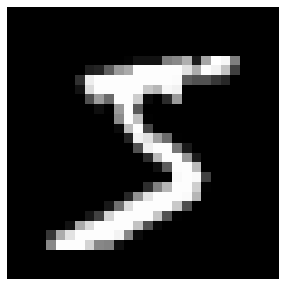

In [2]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [3]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [4]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### **2-2 Sequential API로 모델 생성 및 학습**  

최종 분류기로 Dense 레이어 적용을 위해서 Flatten 층을 추가하여 1차원 배열로 펼쳐줌  
합성곱은 Conv2D 레이어 사용  
풀링 레이어 최대 풀링 적용  
다중 분류 문제이므로 활성화 함수로 softmax 적용

In [6]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2181 - accuracy: 0.9381 - val_loss: 0.0900 - val_accuracy: 0.9733
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0804 - accuracy: 0.9772 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0608 - accuracy: 0.9820 - val_loss: 0.0587 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.0557 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0518 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0514 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0511 -

```evaluate()```메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치 사용
> 검증셋에 대한 약 98% 정확도

In [8]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0519 - accuracy: 0.9847


[0.05187418684363365, 0.9847000241279602]

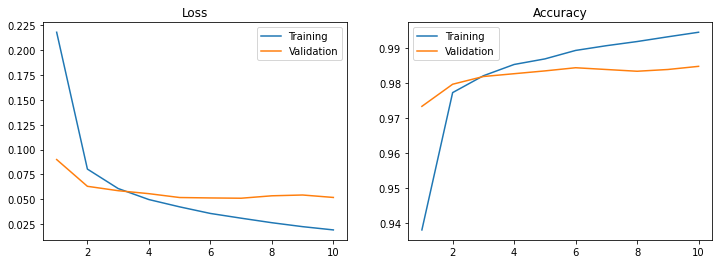

In [9]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

### **2-3 모델 구조 파악**

In [10]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서 추출

In [11]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [12]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [13]:
# 레이어 
model.layers

In [14]:
# 첫번째 레이어 선택
model.layers[0]

In [15]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [17]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.5090332 ,  0.40003031, -0.14495037, -0.9051645 ,
           -0.88563937,  0.3505056 ,  0.38128155,  0.05037944,
            0.11734079, -0.07773177,  0.280222  , -1.2603885 ,
            0.36262718, -0.6299191 ,  0.19766317,  0.26815224,
            0.47310168,  0.1251758 ,  0.37080303,  0.4264757 ,
            0.0840247 , -0.5715535 , -0.7754322 , -0.37177047,
            0.27347794, -0.5074587 , -0.75638205, -0.00754067,
           -0.53080684, -0.02238486,  0.3123043 , -0.40631366]],
 
         [[ 0.00529049,  0.20621283, -0.2340654 , -0.50033134,
           -0.18090428,  0.0863683 ,  0.18110257,  0.18919475,
            0.3668953 ,  0.44658944,  0.28932777, -1.1260499 ,
            0.23786366, -0.72373253, -0.32338828, -0.00637692,
           -0.12643726,  0.46180892,  0.03995598, -0.06703843,
            0.3576689 , -0.06905352,  0.33071098, -0.30133903,
            0.5344289 , -0.7086293 , -0.53

In [18]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.5090332 ,  0.40003031, -0.14495037, -0.9051645 ,
          -0.88563937,  0.3505056 ,  0.38128155,  0.05037944,
           0.11734079, -0.07773177,  0.280222  , -1.2603885 ,
           0.36262718, -0.6299191 ,  0.19766317,  0.26815224,
           0.47310168,  0.1251758 ,  0.37080303,  0.4264757 ,
           0.0840247 , -0.5715535 , -0.7754322 , -0.37177047,
           0.27347794, -0.5074587 , -0.75638205, -0.00754067,
          -0.53080684, -0.02238486,  0.3123043 , -0.40631366]],

        [[ 0.00529049,  0.20621283, -0.2340654 , -0.50033134,
          -0.18090428,  0.0863683 ,  0.18110257,  0.18919475,
           0.3668953 ,  0.44658944,  0.28932777, -1.1260499 ,
           0.23786366, -0.72373253, -0.32338828, -0.00637692,
          -0.12643726,  0.46180892,  0.03995598, -0.06703843,
           0.3576689 , -0.06905352,  0.33071098, -0.30133903,
           0.5344289 , -0.7086293 , -0.537123  ,  0.433233

In [19]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.22361301, -0.12660834, -0.16708045, -0.1258831 , -0.02597916,
       -0.33232334, -0.44170225, -0.3082503 , -0.27778357, -0.03448109,
       -0.2175001 ,  0.16834286, -0.46151587,  0.08222464, -0.2512654 ,
       -0.22309397, -0.08216217, -0.09584475, -0.36584905, -0.46478602,
       -0.1187769 , -0.0569003 , -0.03707981, -0.41445896, -0.00847256,
       -0.00068464, -0.05362555, -0.02767168, -0.31248108, -0.16273803,
       -0.37735772, -0.2414635 ], dtype=float32)>

In [20]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [21]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

2

In [22]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

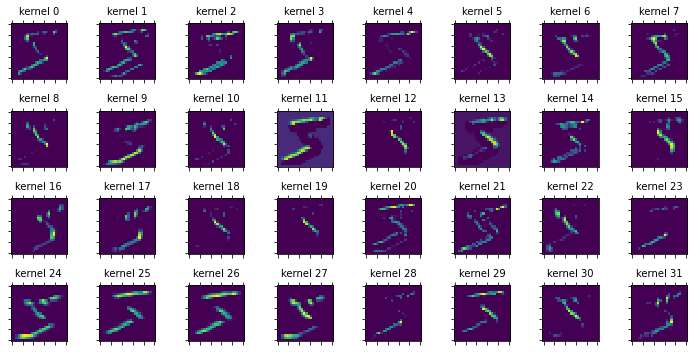

In [23]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [24]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


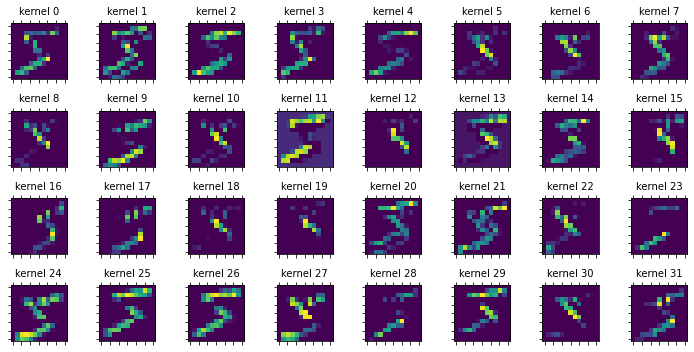

In [25]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# **03 복잡한 모델 생성**  

: Keras의 Functional API를 사용하면 Sequential API로 구현할 수 없는 복잡한 구조의 모델을 정의할 수 있음

### **3-1 데이터셋 준비**

In [26]:
import tensorflow as tf
import numpy as np

# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [28]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [29]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [30]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### **3-2 Functional API로 다중입력, 다중 출력 레이어 생성**  

입력 레이어 inputs의 경우 : Conv2D 레이어와 Flatten 레이어의 입력으로 사용 (2개의 입력 레이어 출력)  
> 함수의 입력과 출력으로 표현 가능해 자유롭게 무델 구조를 정의

In [31]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

In [32]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

ImportError: ignored

In [33]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2032 - accuracy: 0.9432 - val_loss: 0.0867 - val_accuracy: 0.9735
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0761 - accuracy: 0.9776 - val_loss: 0.0687 - val_accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0596 - val_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0635 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0592 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0604 -

### **3-3 다중 출력 분류 모델**

In [36]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [37]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


In [38]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

ImportError: ignored

In [39]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, 
              # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, 
                    {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3528 - digit_dense_loss: 0.1918 - odd_dense_loss: 0.3219 - digit_dense_accuracy: 0.9451 - odd_dense_accuracy: 0.8669 - val_loss: 0.2298 - val_digit_dense_loss: 0.0915 - val_odd_dense_loss: 0.2765 - val_digit_dense_accuracy: 0.9718 - val_odd_dense_accuracy: 0.8850
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2108 - digit_dense_loss: 0.0750 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9783 - odd_dense_accuracy: 0.8911 - val_loss: 0.1953 - val_digit_dense_loss: 0.0640 - val_odd_dense_loss: 0.2626 - val_digit_dense_accuracy: 0.9808 - val_odd_dense_accuracy: 0.8960
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1889 - digit_dense_loss: 0.0575 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.8960 - val_loss: 0.1871 - val_digit_dense_loss: 0.0576 - val_odd_dense_loss: 0.2588 - val_digit_dense_accuracy: 0.9812 -

In [40]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.1917 - digit_dense_loss: 0.0641 - odd_dense_loss: 0.2552 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.9020


[0.19170106947422028,
 0.06408640742301941,
 0.25522947311401367,
 0.9825000166893005,
 0.9020000100135803]

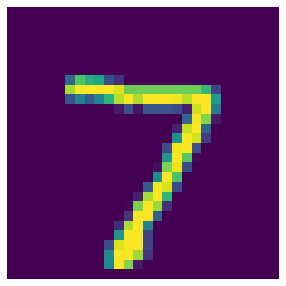

In [41]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [42]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[7.5303972e-13 4.1567041e-10 1.0591380e-09 5.1816221e-07 7.4751342e-12
 5.1174162e-11 3.5801407e-21 9.9999917e-01 3.1836913e-09 3.3699263e-07]
[0.999561]


In [43]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [44]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### **3-4 전이학습**  

: 기존에 학습된 모델을 활용해 새로운 모델을 만들어내는 개념

In [45]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [46]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

ImportError: ignored

In [47]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [48]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

ImportError: ignored

In [49]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1302 - accuracy: 0.9622 - val_loss: 0.0677 - val_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0511 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0584 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0582 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0534 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0553 -

In [50]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [51]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [52]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1157 - accuracy: 0.9688 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0540 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0519 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0543 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0528 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0491 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0574 - val_ac

In [53]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [54]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [55]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1157 - accuracy: 0.9678 - val_loss: 0.0603 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0472 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0553 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0545 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0555 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0557 - val_ac